# Lectura de data

In [ ]:
import pandas as pd
data=pd.read_excel('/content/DataSet.xlsx')
print(data.shape)
data.head(10)

(2345, 11)


,idEquipo,Equipo,Cliente,fecha,Hora,tempEvaporador,tempAmbiente,Humedad,Vatios,sale,entra
0,23,Postobon 1,Postobon,2021-03-01,11,4.9,29.7,57.8,0.0,0.0,0.0
1,23,Postobon 1,Postobon,2021-03-01,12,3.0,27.5,64.3,0.0,0.0,0.0
2,23,Postobon 1,Postobon,2021-03-01,13,3.0,26.5,66.2,0.0,0.0,0.0
3,23,Postobon 1,Postobon,2021-03-01,14,3.7,26.3,65.4,0.0,0.0,0.0
4,23,Postobon 1,Postobon,2021-03-01,15,3.9,26.1,66.9,0.0,0.0,0.0
5,23,Postobon 1,Postobon,2021-03-01,16,4.0,25.4,72.6,0.0,0.0,0.0
6,23,Postobon 1,Postobon,2021-03-01,17,3.9,25.2,73.9,0.0,0.0,0.0
7,23,Postobon 1,Postobon,2021-03-01,18,3.8,24.9,74.7,0.0,0.0,0.0
8,23,Postobon 1,Postobon,2021-03-01,19,3.9,24.3,78.5,0.0,0.0,0.0
9,23,Postobon 1,Postobon,2021-03-01,20,4.0,23.5,86.5,0.0,0.0,0.0


|      Campo          |       Descripción                                        |
|:--------------------:|:---------------------------------------------------------:|
| idEquipo | Identificación del equipo de monitoreo  |
| Equipo | Nombre del equipo de monitoreo |
| Cliente | Nombre del Cliente Dueño del equipo de Monitoreo |
|Fecha | Fecha de la captura de los datos |
| Hora | Hora de la captura de los datos |
| tempEvaporador | float con la temperatura momento del equipo de refigeración |
| tempAmbiente | float con la temperatura ambiente|
| Humedad | float con la  Humedad relativa |
| Vatios | float con la cantidad de vatios consumidos por el equipo de refrigerración|
| sale | float con la cantidad de gramos que ingresan al equipo de refrigeración|
| entra | float con la cantidad de gramos que salen del equipo de refrigeración |

# Problematica
Los dispositivos mandan mucho informacion pero no se sabe a certeza en que momento podria fallar un dispositivo

# Objetivo 
Que tan bien esta trabajando el dispositivo y en que momento podria presentar algun tipo de falla en el tiempo. 

Importancia de variables: tempEvaporador, tempAmbiente, Humedad (Definen el criterio de falla)

In [ ]:
# Verificar los nulos
data.isnull().values.any()

False

In [ ]:
data.isna().sum()
# Estos vacios pueden ocurrir porque cuando el dispositivo se inicializa o tambien puede ser una señal de alerta 

idEquipo          0
Equipo            0
Cliente           0
fecha             0
Hora              0
tempEvaporador    0
tempAmbiente      0
Humedad           0
Vatios            0
sale              0
entra             0
dtype: int64

In [ ]:
data.columns

Index(['idEquipo', 'Equipo', 'Cliente', 'fecha', 'Hora', 'tempEvaporador',
       'tempAmbiente', 'Humedad', 'Vatios', 'sale', 'entra'],
      dtype='object')

# 0) EDA
## Tarea 2 : Generar graficas de esas variables  (Por cada dispositivo)
Exploraar Boxplots, violionplot, distplot

In [ ]:
data.describe()

,idEquipo,Hora,tempEvaporador,tempAmbiente,Humedad,Vatios,sale,entra
count,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000,2345.000000
mean,16.980384,11.612793,5.316972,22.663966,74.725672,28.949168,0.104350,0.116674
std,10.613982,6.894327,2.752043,4.724303,11.110614,58.166193,1.213595,1.111677
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,6.000000,3.900000,21.800000,66.700000,0.000000,0.000000,0.000000
50%,22.000000,12.000000,4.900000,23.500000,75.300000,0.400000,0.000000,0.000000
75%,25.000000,18.000000,6.000000,25.700000,83.100000,8.800000,0.000000,0.000000
max,27.000000,23.000000,17.100000,32.200000,95.000000,286.000000,25.000000,19.200000


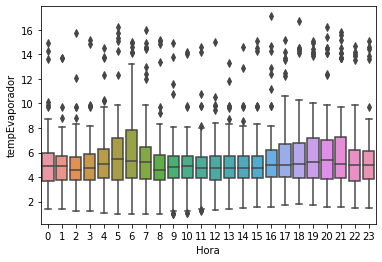

In [ ]:
import seaborn as sns
sns.boxplot(x='Hora', y='tempEvaporador', data=data)

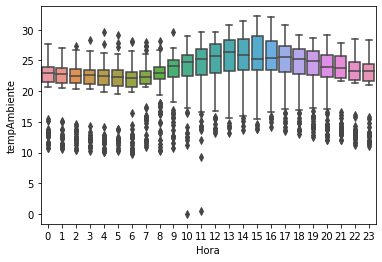

In [ ]:
sns.boxplot(x='Hora', y='tempAmbiente', data=data)

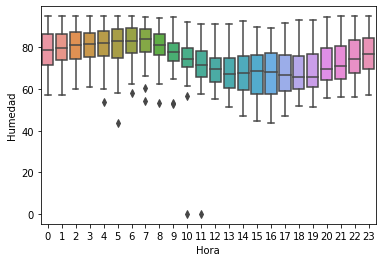

In [ ]:
sns.boxplot(x='Hora', y='Humedad', data=data)

In [ ]:
#Copia al DataFrame Original 
df = data.copy()
from seaborn import lmplot
from seaborn import kdeplot
from seaborn import distplot

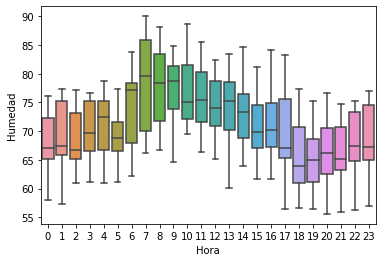

In [ ]:
# dfEquipo22 es el DataFrame que contiene todos los registros asociados al equipo 22
dfEquipo22=df[(df.idEquipo == 22)]
sns.boxplot(x='Hora', y='Humedad', data=dfEquipo22)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


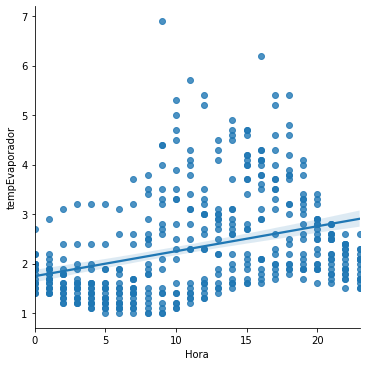

In [ ]:
lmplot('Hora', 'tempEvaporador', data=dfEquipo22)

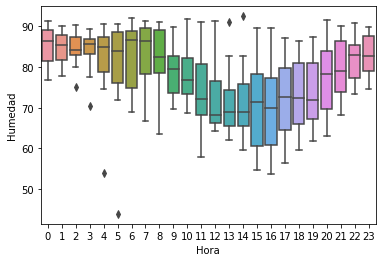

In [ ]:
dfEquipo23=df[(df.idEquipo == 23)]
sns.boxplot(x='Hora', y='Humedad', data=dfEquipo23)

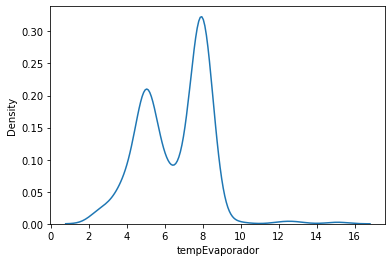

In [ ]:
kdeplot(dfEquipo23.tempEvaporador)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


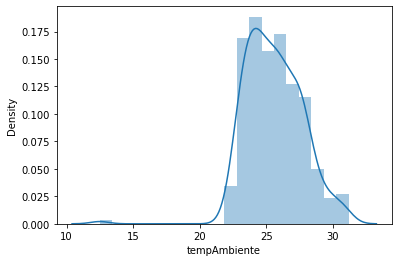

In [ ]:
dfEquipo24=df[(df.idEquipo == 24)]
distplot(dfEquipo24.tempAmbiente)

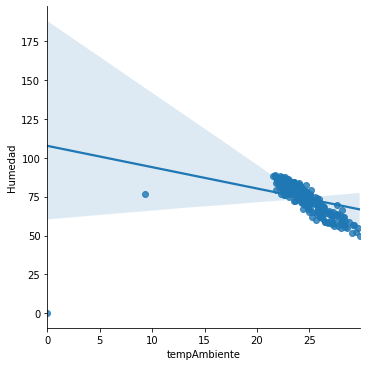

In [ ]:
dfEquipo25=df[(df.idEquipo == 25)]
lmplot(x="tempAmbiente", y="Humedad", data=dfEquipo25)

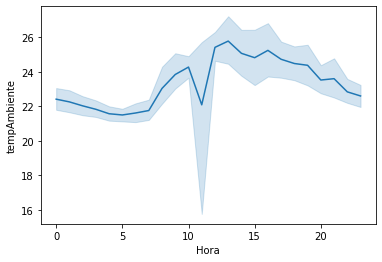

In [ ]:
dfEquipo26=df[(df.idEquipo == 26 )]
sns.lineplot(x="Hora", y="tempAmbiente",            
             data=dfEquipo26)

In [ ]:
dfEquipo27=df[(df.idEquipo == 27)]

# 1) Definir la columna de Propenso a falla (prop_falla) (1 o 0)

In [ ]:
# Definir criterios falla ( disyuncion o un OR de posibles causas de falla)
'''
# Criterios individuales
1) tempEvaporador  (2ºC <=x<= 8 ºC)
2) tempAmbiente  (x<=50ºC )
3) Humedad 
###########################################################################
# Criterios conjuntos
4) TAREA!!!!!!!!
5) tempEvaporador alta como tempAmbiente (Complejas) Cuartiles para dos temperatura .......
'''
# Funcion para asignar la columna de posible falla 
def conditions(s):
    if (s['tempEvaporador']>8 or s['tempEvaporador']<2) and (s['tempAmbiente'] > 27):
        return 1
    else:
        return 0
# Aplicar la funcion conditions para crear la columna Clase 
data['Clase'] = data.apply(conditions, axis=1)
data.head(10)

,idEquipo,Equipo,Cliente,fecha,Hora,tempEvaporador,tempAmbiente,Humedad,Vatios,sale,entra,Clase
0,23,Postobon 1,Postobon,2021-03-01,11,4.9,29.7,57.8,0.0,0.0,0.0,0
1,23,Postobon 1,Postobon,2021-03-01,12,3.0,27.5,64.3,0.0,0.0,0.0,0
2,23,Postobon 1,Postobon,2021-03-01,13,3.0,26.5,66.2,0.0,0.0,0.0,0
3,23,Postobon 1,Postobon,2021-03-01,14,3.7,26.3,65.4,0.0,0.0,0.0,0
4,23,Postobon 1,Postobon,2021-03-01,15,3.9,26.1,66.9,0.0,0.0,0.0,0
5,23,Postobon 1,Postobon,2021-03-01,16,4.0,25.4,72.6,0.0,0.0,0.0,0
6,23,Postobon 1,Postobon,2021-03-01,17,3.9,25.2,73.9,0.0,0.0,0.0,0
7,23,Postobon 1,Postobon,2021-03-01,18,3.8,24.9,74.7,0.0,0.0,0.0,0
8,23,Postobon 1,Postobon,2021-03-01,19,3.9,24.3,78.5,0.0,0.0,0.0,0
9,23,Postobon 1,Postobon,2021-03-01,20,4.0,23.5,86.5,0.0,0.0,0.0,0


In [ ]:
# Mirar que hayan quedado las dos categorias 
data.Clase.unique()

array([0, 1])

In [ ]:
len(data['idEquipo'].unique())

7

In [ ]:
data.idEquipo.unique()

array([23, 24, 25, 26, 27,  1, 22])

In [ ]:
data.Cliente.unique()

array(['Postobon', 'SECRETARIA DE SALUD DEPARTAMENTAL', 'Cruz Roja'],
      dtype=object)

# Definir la data del modelo

In [ ]:
data['Cliente']=data["Cliente"].astype("category")
data['Cliente']=data['Cliente'].cat.codes
data.Cliente

0       1
1       1
2       1
3       1
4       1
       ..
2340    0
2341    0
2342    0
2343    0
2344    0
Name: Cliente, Length: 2345, dtype: int8

In [ ]:
#  Agregar columna crc_error (1 o 0)
data_modelo= data[['idEquipo','Cliente','Hora','tempEvaporador','tempAmbiente','Humedad','Vatios','sale','entra','Clase']]
data_modelo

,idEquipo,Cliente,Hora,tempEvaporador,tempAmbiente,Humedad,Vatios,sale,entra,Clase
0,23,1,11,4.9,29.7,57.8,0.0,0.0,0.0,0
1,23,1,12,3.0,27.5,64.3,0.0,0.0,0.0,0
2,23,1,13,3.0,26.5,66.2,0.0,0.0,0.0,0
3,23,1,14,3.7,26.3,65.4,0.0,0.0,0.0,0
4,23,1,15,3.9,26.1,66.9,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
2340,22,0,12,5.4,20.5,74.6,0.4,0.0,0.0,0
2341,22,0,13,4.5,19.1,78.8,0.4,0.0,0.0,0
2342,22,0,14,4.7,20.5,76.0,0.4,0.0,0.0,0
2343,22,0,15,4.6,21.7,63.3,0.4,0.0,0.0,0


In [ ]:
# Tecnicas esclamiento solo (numericas-continuas) : 1) Min Max Scaling   2) Z score

# 2) Random forest (Clasificador)

In [ ]:
import pandas as pd
import pydotplus
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from io import StringIO
from IPython.display import Image, SVG
from graphviz import Source
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Patch
from scipy.stats import chi2_contingency, norm
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from statsmodels.formula.api import ols
from sympy import var, plot_implicit, Eq

In [ ]:
X=data_modelo[['idEquipo','Cliente','Hora','tempEvaporador','tempAmbiente','Humedad','Vatios','sale','entra']]
y= data_modelo['Clase']
X

,idEquipo,Cliente,Hora,tempEvaporador,tempAmbiente,Humedad,Vatios,sale,entra
0,23,1,11,4.9,29.7,57.8,0.0,0.0,0.0
1,23,1,12,3.0,27.5,64.3,0.0,0.0,0.0
2,23,1,13,3.0,26.5,66.2,0.0,0.0,0.0
3,23,1,14,3.7,26.3,65.4,0.0,0.0,0.0
4,23,1,15,3.9,26.1,66.9,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2340,22,0,12,5.4,20.5,74.6,0.4,0.0,0.0
2341,22,0,13,4.5,19.1,78.8,0.4,0.0,0.0
2342,22,0,14,4.7,20.5,76.0,0.4,0.0,0.0
2343,22,0,15,4.6,21.7,63.3,0.4,0.0,0.0


In [ ]:
# Hacer split TRAIN (75%)  y TEST (25%) 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Cross validation 
criterion=['gini', 'entropy']
n_estimators=[10,20,30,40,50,60,70,80,90,100] # Numero de arboles de decision
max_depth=[3,4,5,6,7,8,9,10] # Cuidado con overfit 
max_features=["auto","sqrt","log2"] # Numero de features para resampling 
min_samples_split=[2,5,10,15,20] # Minimmo numero de muestras para hacer el split muy grande underfit
min_samples_leaf=[1,2,5,10,15] #Parametro para parar el crecimiento de arboles una vez el minimum number of samples por split se alcanzo 

In [ ]:
# Diccionario de hiperparametros
grid_param={"criterion": criterion,
            "n_estimators":n_estimators,
           "max_features":max_features,
           "max_depth": max_depth,
           "min_samples_split": min_samples_split,
           "min_samples_leaf": min_samples_leaf}

In [ ]:
# Numero de modelos posibles 
from sklearn.model_selection import RandomizedSearchCV
RFR=RandomForestClassifier(random_state=1)
RFR

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
# Numero de folds cross validation cv=5-10
RFR_random=RandomizedSearchCV(estimator=RFR, param_distributions=grid_param, n_iter=500,
                             cv=5, verbose=2, random_state=42, n_jobs=-1)

In [ ]:
RFR_random.fit(X,y)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 558 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done 1370 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2493 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  3.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
# Luego de las iteraciones y el numero de cross validation folds imprimir los mejores parametros
print(RFR_random.best_params_)

{'n_estimators': 70, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'entropy'}


# Modelo despues de eleccion de parametros

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=1234)

# Create the Regression model with Random Forest
RandomforestRegModel= RandomForestClassifier(bootstrap=True, criterion='gini',max_depth=5,max_features='sqrt',\
                                           min_samples_split=15, min_samples_leaf=10,\
                                           n_estimators=60)
# Train the model
RandomforestRegModel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y_pred=RandomforestRegModel.predict(X_test)
dataSet=pd.DataFrame(y_pred, y_test)
dataSet.columns =['Prediccion']
dataSet.tail(100)

,Prediccion
Clase,
0,0
0,0
0,0
0,0
0,0
...,...
0,0
0,0
0,0


In [ ]:
dataSet[dataSet['Prediccion']==1]

,Prediccion
Clase,
1,1


# 3) XGBOOST (Clasificador) Propension (0-1) 

Se selecciona el modelo XGBOOST para definir la prospensión(Que tan susceptible es el dispositivo a presentar condensación)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# loading packages
# basico + fechas 
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# estadistica
from statsmodels.distributions.empirical_distribution import ECDF

# analisis de series de tiempo
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# prophet by Facebook
#from fbprophet import Prophet

# machine learning: XGB
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from xgboost.sklearn import XGBRegressor # wrapper

In [ ]:
X=data_modelo[['idEquipo','Cliente','Hora','tempEvaporador','tempAmbiente','Humedad','Vatios','sale','entra']]
y= data_modelo['Clase']
X

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
def logregobj(preds, dtrain):
    labels = dtrain.get_label()
    preds = 1.0 / (1.0 + np.exp(-preds))
    grad = preds - labels
    hess = preds * (1.0 - preds)
    return grad, hess

In [ ]:
# base parameters
params = {'base_score': 0.5,
                 'booster': 'gbtree',
                 'colsample_bylevel': 1,
                 'colsample_bytree': 1,
                 'gamma': 4.5,
                 'learning_rate': 0.04,
                 'max_delta_step': 0,
                 'max_depth': 7,
                 'min_child_weight': 2,
                 'missing': np.nan,
                 'objective': 'binary:logistic',
                 'reg_alpha': 0,
                 'reg_lambda': 1.3,
                 'scale_pos_weight': 3,
                 'seed': 0,
                 'silent': 1,
                 'subsample': 1}

In [ ]:
# XGB with xgboost library
dtrain = xgb.DMatrix(x_train[['idEquipo','Cliente','Hora','tempEvaporador','tempAmbiente','Humedad','Vatios','sale','entra']], y_train)
dtest = xgb.DMatrix(x_test[['idEquipo','Cliente','Hora','tempEvaporador','tempAmbiente','Humedad','Vatios','sale','entra']], y_test)

watchlist = [(dtrain, 'train'), (dtest, 'test')]

xgb_model = xgb.train(params, dtrain, 100, evals = watchlist,
                      early_stopping_rounds = 50, verbose_eval = True,obj=logregobj)
# elegir otra metrica para el error

In [ ]:
# with new parameters
params_new = {'base_score': 0.5,
                 'booster': 'gbtree',
                 'colsample_bylevel': 1,
                 'colsample_bytree': 1,
                 'gamma': 5.5,
                 'learning_rate': 0.05,
                 'max_delta_step': 0,
                 'max_depth': 3,
                 'min_child_weight': 2,
                 'missing': np.nan,
                 'objective': 'binary:logistic',
                 'reg_alpha': 0,
                 'reg_lambda': 1.5,
                 'scale_pos_weight': 3,
                 'seed': 42,
                 'silent': 1,
                 'subsample': 1}

model_final = xgb.train(params_new, dtrain, 130, evals = watchlist,
                        early_stopping_rounds = 50, verbose_eval = True)

In [ ]:
xgb.plot_importance(model_final)

In [ ]:
yhat = model_final.predict(xgb.DMatrix(x_test[['idEquipo','Cliente','Hora','tempEvaporador','tempAmbiente','Humedad','Vatios','sale','entra']]))
yhat

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
test1_xgb_probs = model_final.predict(dtest)
roc_auc_score(y_test, test1_xgb_probs)

In [ ]:
# Probabilidades de falla
test1_xgb_probs

In [ ]:
dataSet=pd.DataFrame(test1_xgb_probs, y_test)
dataSet.columns =['Prediccion']

dataSet.tail(100)

In [ ]:
dataSet[dataSet['Prediccion']>0.8]

In [ ]:
dataSet.shape
dataSet=dataSet.reset_index()
dataSet

In [ ]:
x_test.shape
x_test1=x_test.reset_index()
x_test1.head()

,index,idEquipo,Cliente,Hora,tempEvaporador,tempAmbiente,Humedad,Vatios,sale,entra
0,1305,1,2,21,5.3,27.0,62.9,0.1,0.0,0.0
1,2208,22,0,0,1.8,11.5,75.8,0.4,0.0,0.0
2,558,24,1,1,3.8,25.6,73.6,157.0,0.0,0.0
3,1533,1,2,12,5.8,26.6,65.8,7.5,0.0,0.0
4,1860,1,2,3,4.7,24.4,83.3,0.0,0.0,0.0


In [ ]:
x_test1['Propension falla']=dataSet['Prediccion']
x_test1

,index,idEquipo,Cliente,Hora,tempEvaporador,tempAmbiente,Humedad,Vatios,sale,entra,Propension falla
0,1305,1,2,21,5.3,27.0,62.9,0.1,0.0,0.0,0.017425
1,2208,22,0,0,1.8,11.5,75.8,0.4,0.0,0.0,0.017425
2,558,24,1,1,3.8,25.6,73.6,157.0,0.0,0.0,0.017425
3,1533,1,2,12,5.8,26.6,65.8,7.5,0.0,0.0,0.017425
4,1860,1,2,3,4.7,24.4,83.3,0.0,0.0,0.0,0.017425
...,...,...,...,...,...,...,...,...,...,...,...
582,1574,1,2,5,4.5,22.2,88.3,0.0,0.0,0.0,0.017425
583,1021,27,1,16,4.3,27.6,53.0,0.0,0.0,0.0,0.017587
584,1170,1,2,6,5.3,22.7,91.4,0.0,0.0,0.0,0.017425
585,1323,1,2,15,5.8,29.5,54.7,0.1,0.0,0.0,0.017587


# 4) Evaluar modelos

Al ejecutar el modelo Random forest y XGBOOST con la data de prueba, decidimos quedarnos con el modelo XGBOOST(Prospención) pues este nos permite ver de forma más acertada que tan susceptible es el dispositivo a presentar condensación "Punto de Rocio" de un equipo.

# 5) Replicar modelo a nueva data (modelo en .pkl)

In [ ]:
# Exportar a Joblib (Poner ruta)
from sklearn.externals import joblib
joblib.dump(model_final, 'modelo_XGBOOST_SINCRON.joblib')

In [ ]:
from sklearn.externals import joblib
loaded_model = joblib.load('modelo_XGBOOST_SINCRON.joblib')
loaded_model

In [ ]:
loaded_model.predict(xgb.DMatrix(x_test[['idEquipo','Cliente','Hora','tempEvaporador','tempAmbiente','Humedad','Vatios','sale','entra']]))